## 自动编码机

``` 
Auto Encoder Example.
Using an auto encoder on MNIST handwritten digits.
References:
    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based
    learning applied to document recognition." Proceedings of the IEEE,
    86(11):2278-2324, November 1998.
Links:
    [MNIST Dataset] http://yann.lecun.com/exdb/mnist/
    

```
![](http://ogtxggxo6.bkt.clouddn.com/autoencode.jpg?imageView2/2/w/650)
```
这里的自动编码机的结构如上图所示：手写数字图片为24*24，展开为784个输入节点，之后两层隐藏层构成了编码层，维数变化为784->256,256-128,这后是解码层，维度变化为128->256,256->784,这样的转换后就又重构出一个图像了。
```
![](http://ogtxggxo6.bkt.clouddn.com/auto.png?imageslim)

In [13]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./../mnist/MNIST_data/", one_hot=True)

Extracting ./../mnist/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./../mnist/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./../mnist/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./../mnist/MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
# Parameters
learning_rate = 0.01
training_epochs = 30
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

In [15]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [16]:
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples/batch_size)
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(c))

print("Optimization Finished!")

# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
f.show()
plt.draw()

Epoch: 0001 cost= 0.178166002
Epoch: 0002 cost= 0.145160064
Epoch: 0003 cost= 0.135177642
Epoch: 0004 cost= 0.124058448
Epoch: 0005 cost= 0.120400004
Epoch: 0006 cost= 0.110286936
Epoch: 0007 cost= 0.102577075
Epoch: 0008 cost= 0.101155698
Epoch: 0009 cost= 0.097908914
Epoch: 0010 cost= 0.095837325
Epoch: 0011 cost= 0.095061466
Epoch: 0012 cost= 0.093358569
Epoch: 0013 cost= 0.092411369
Epoch: 0014 cost= 0.091449663
Epoch: 0015 cost= 0.089596108
Epoch: 0016 cost= 0.085973218
Epoch: 0017 cost= 0.088241212
Epoch: 0018 cost= 0.084847160
Epoch: 0019 cost= 0.084545508
Epoch: 0020 cost= 0.083512463
Epoch: 0021 cost= 0.082028061
Epoch: 0022 cost= 0.080986373
Epoch: 0023 cost= 0.079647653
Epoch: 0024 cost= 0.080544382
Epoch: 0025 cost= 0.079076171
Epoch: 0026 cost= 0.080223359
Epoch: 0027 cost= 0.076759905
Epoch: 0028 cost= 0.076878086
Epoch: 0029 cost= 0.076195642
Epoch: 0030 cost= 0.073022142
Optimization Finished!


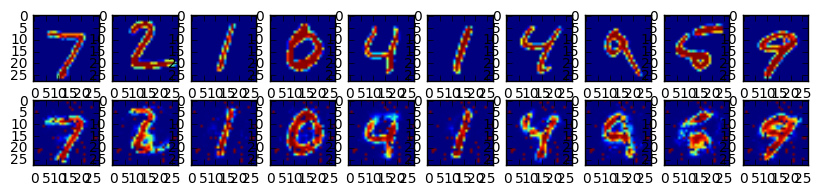

In [17]:
plt.show()

上面的结果中，第一行表示的是测试集原始的图,第二行表示的重构的图。